In [1]:
import sys
sys.path.append('./')
import numpy as np
import pandas as pd
import neural_tape_controller
#Положительные числа - положительные награды.
import tasks 
import optimize
import pickle
root_dir = './'

In [2]:
nt = neural_tape_controller.nt_controller(tacts=1,input_size=36,output_size=5)
genom = nt.nn.disassemble_genom()

In [3]:
try:
    with open(root_dir+f'./genoms/best_genoms_aa_gun.pkl', 'rb') as f:
        genom = pickle.load(f)[-1]
    print('loaded successfully')
except Exception:
    pass

In [4]:
%%time
q=tasks.custom_test(genom, verbose=True, draw=False)
print('q=',q)

C:\Users\kilorad\PYTHON\neuroevolution_toolbox\nnet.py:318: RuntimeWarning: overflow encountered in add
  self.belts[layer['belt_name']][:,:min_len] += in_data[:,:min_len]


aa_gun_2: [1.10000e-03 0.00000e+00 3.00000e-03 1.00011e+01 1.00010e+01 2.10000e-03]  full=0.6669541965750001
q= 0.6669541965748997
Wall time: 3.82 s


In [5]:
print(pd.Timestamp.now())

2022-05-11 17:46:19.342182


In [6]:
%%time
n_jobs = 7
from multiprocessing import Pool
pool = Pool(processes=n_jobs)
y_lst = pool.map(tasks.custom_test, [x for x in [genom]*n_jobs])
pool.close()
pool.join()

Wall time: 11.4 s


In [7]:
print(1)
opt = optimize.optimizer(tasks.custom_test, genom_size=len(genom),parallel_cores=2)
try:
    with open(root_dir+f'./genoms/best_genoms_aa_gun.pkl', 'rb') as f:
        opt.best_genoms = pickle.load(f)
    print('loaded successfully')
except Exception:
    pass
opt.function(opt.best_genoms[-1], verbose=True)

for i in range(1000):
    print('opt#',i)
    opt.optimize()
    with open(root_dir+f'./genoms/best_genoms_aa_gun.pkl', 'wb') as f:
        pickle.dump(opt.best_genoms,f,protocol=pickle.HIGHEST_PROTOCOL)
        print('WRITTEN')

1
aa_gun_2: [0. 0. 0. 0. 0. 0.]  full=3.336666666666667e-07
opt# 0
scores for optimizers augmented [1.e+10 1.e+10 1.e+10 1.e+10 1.e+10 1.e+10 1.e+10 1.e+10]
chosen evol_wide previous_result: nan per tacts: nan


C:\Users\kilorad\PYTHON\neuroevolution_toolbox\optimize.py:36: RuntimeWarning: Mean of empty slice
  mx.append(np.nanmean(self.history_gain[opt_name])-time_penalty*np.nanmean(self.history_time[opt_name]))
C:\Users\kilorad\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


KeyboardInterrupt: 

loaded successfully


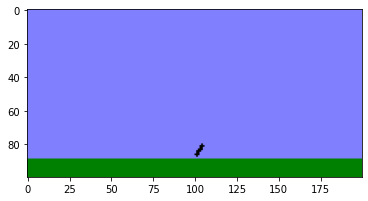

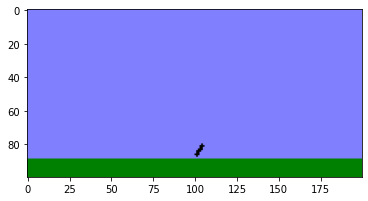

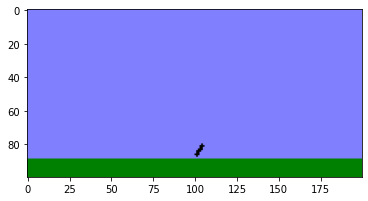

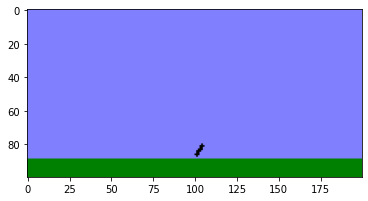

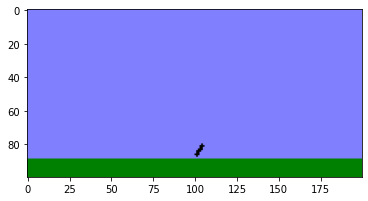

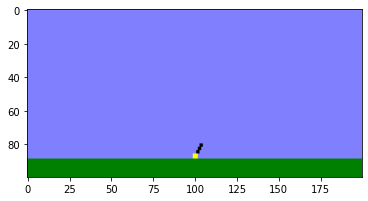

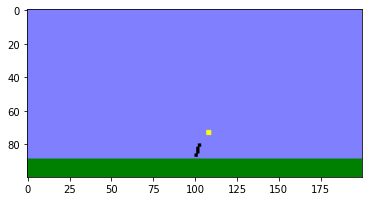

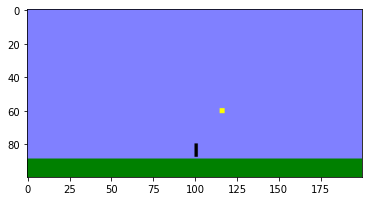

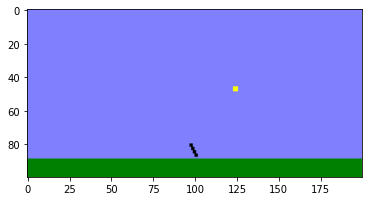

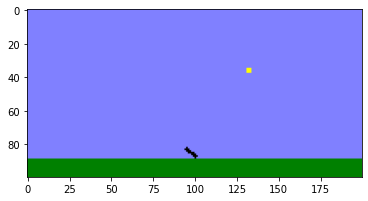

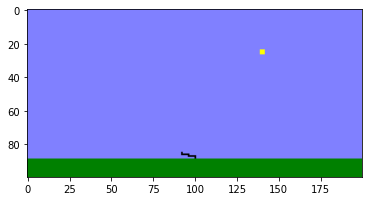

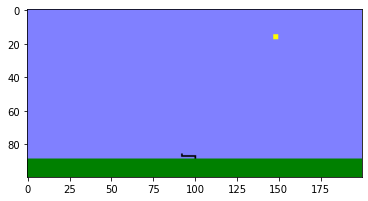

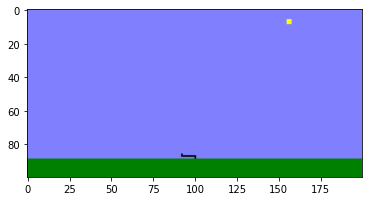

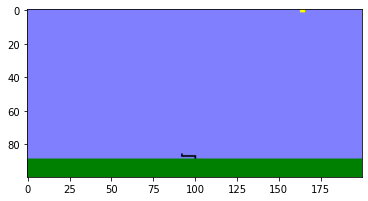

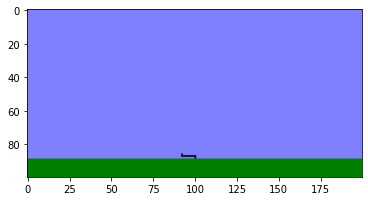

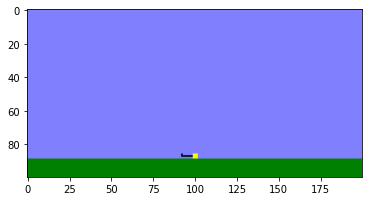

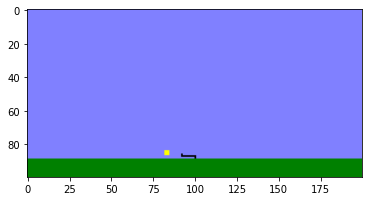

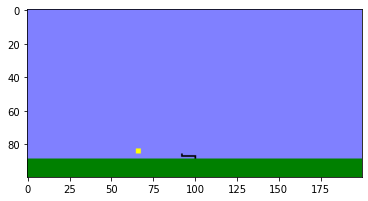

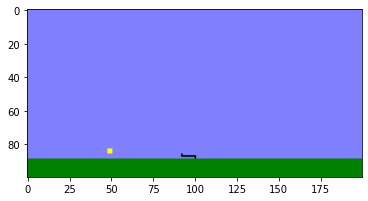

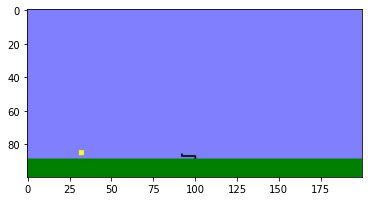

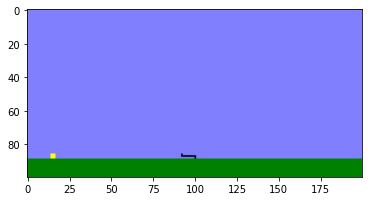

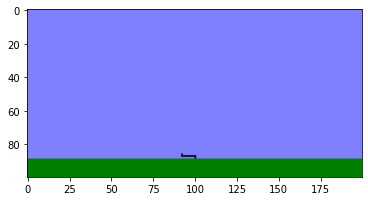

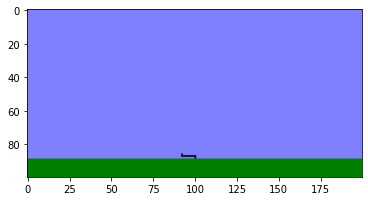

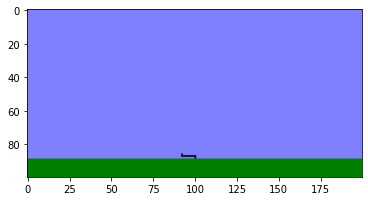

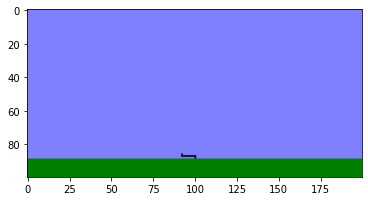

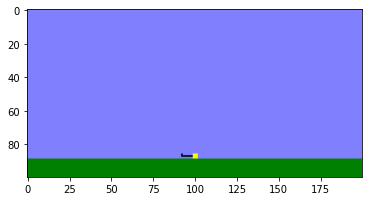

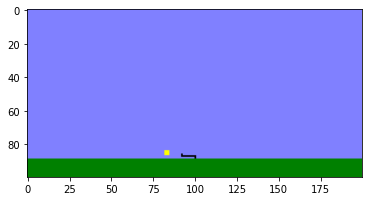

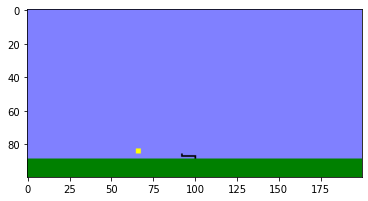

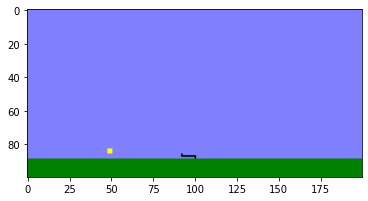

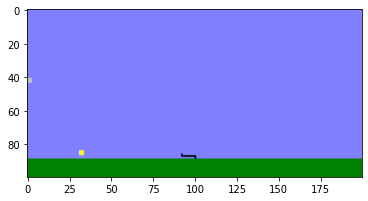

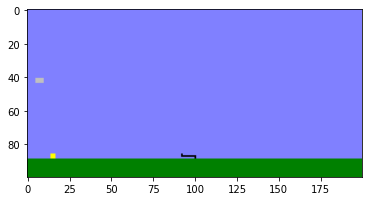

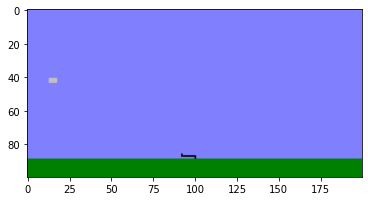

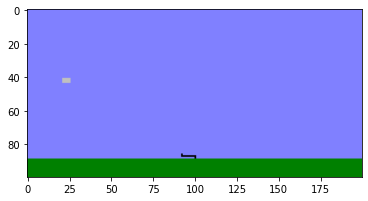

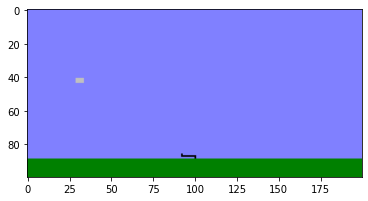

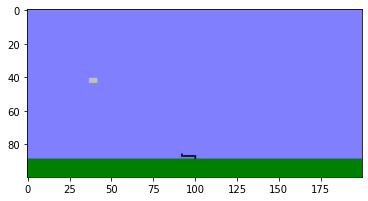

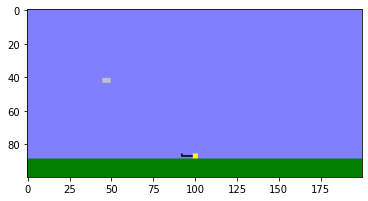

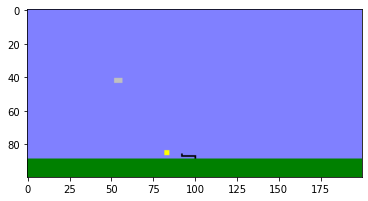

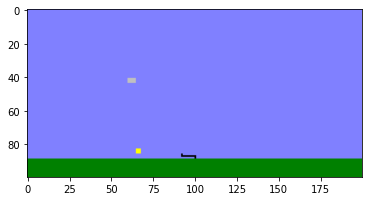

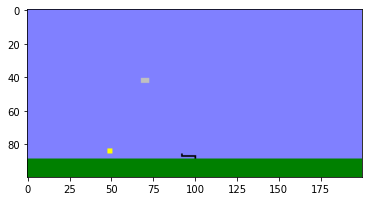

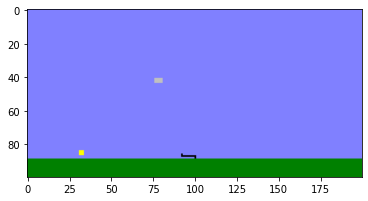

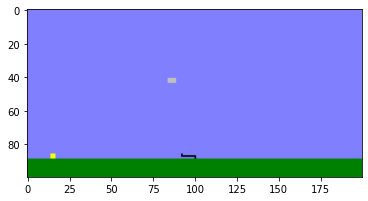

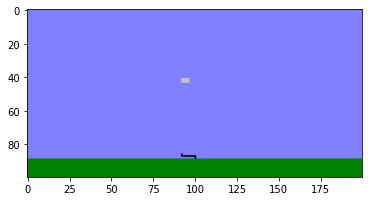

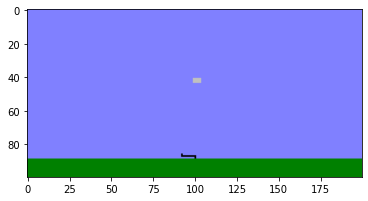

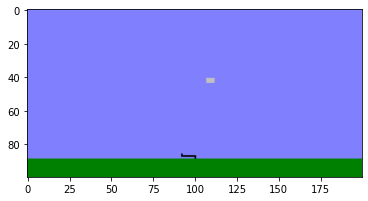

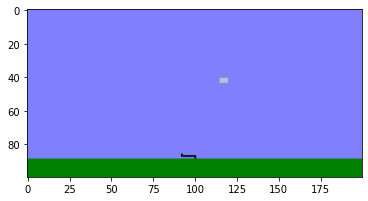

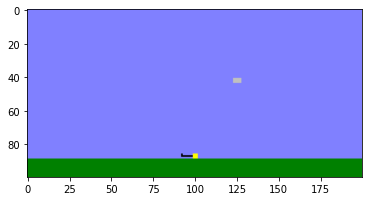

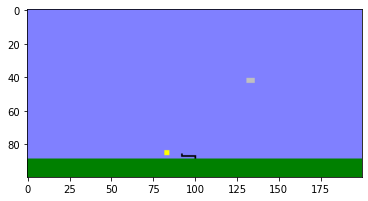

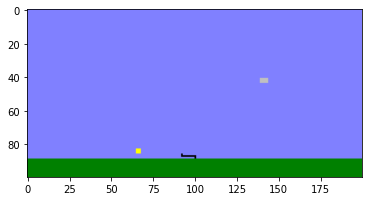

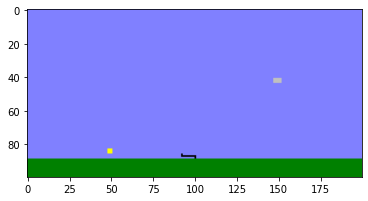

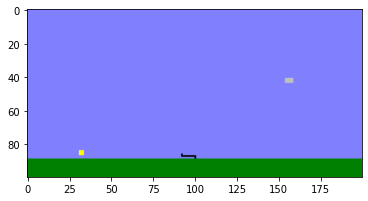

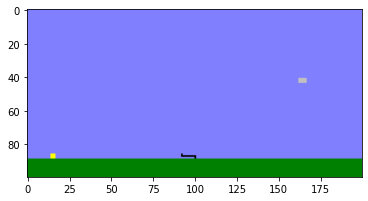

KeyboardInterrupt: 

In [8]:
#draw
with open(root_dir+f'./genoms/best_genoms_aa_gun.pkl', 'rb') as f:
    genom = pickle.load(f)
    genom = genom[-1]
print('loaded successfully')
q=tasks.custom_test(genom, verbose=True, draw=True)
print('q=',q)
tasks.video[0].save(
    root_dir+'./out_videos/best_genoms_aa_gun.gif',
    save_all=True,
    append_images=tasks.video[1:], 
    optimize=True,
    duration=100,
    loop=0
)